# Roberto Ramírez Monroy   A01366943

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.tail()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [60]:
# 4 vars
X = df.iloc[:,0:4].values
# Target
y = df.iloc[:,4].values

In [61]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [62]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [63]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [64]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Eigenvalues en orden descendiente:
2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [65]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


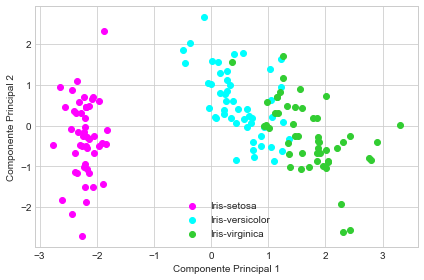

In [66]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

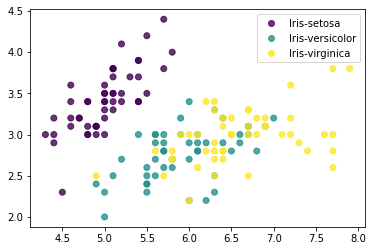

In [67]:
labels, index = np.unique(df["especie"], return_inverse=True)

fig, ax = plt.subplots()
sc = ax.scatter(df['lng sepalo'], df['anch sepalo'], marker = 'o', c = index, alpha = 0.8)
ax.legend(sc.legend_elements()[0], labels)
plt.show()


En las gráficas anteriores, podemos ver como están los datos separados, con las componentes principales calculadas y después el dataset original, donde solamente estamos tomando dos variables independientes.

## Training Models


### Original

In [68]:
names = df['especie']
names.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
names

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: especie, Length: 150, dtype: object

In [70]:
feature_names = ['lng sepalo','anch sepalo','lng petalo','anch petalo']
XOrg = df[feature_names]
yOrg = names

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
YOrg = enc.fit_transform(yOrg[:, np.newaxis]).toarray()

In [72]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaledOrg = scaler.fit_transform(XOrg)

In [73]:
# Split the data set into training and testing
X_trainOrg, X_testOrg, Y_trainOrg, Y_testOrg = train_test_split(
    X_scaledOrg, YOrg, test_size=0.25, random_state=2)

In [74]:
n_featuresOrg = XOrg.shape[1]
n_classesOrg = YOrg.shape[1]
print(n_featuresOrg)
print(n_classesOrg)

4
3


In [97]:
from keras.models import Sequential
from keras.layers import Dense

modelOrg = Sequential()

modelOrg.add(Dense(8, activation='relu', input_shape=(4,)))

modelOrg.add(Dense(8, activation='relu'))

modelOrg.add(Dense(8, activation='relu'))

modelOrg.add(Dense(3, activation='softmax'))

In [98]:
modelOrg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hcOrg = modelOrg.fit(X_trainOrg, Y_trainOrg,epochs=100, batch_size=1, verbose=1, validation_data=(X_testOrg, Y_testOrg))

Train on 112 samples, validate on 38 samples
Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.3125 - val_loss: 1.0478 - val_accuracy: 0.3421
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.9902 - accuracy: 0.5000 - val_loss: 0.9617 - val_accuracy: 0.6842
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.7232 - val_loss: 0.8678 - val_accuracy: 0.7368
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.7903 - accuracy: 0.7500 - val_loss: 0.7281 - val_accuracy: 0.8158
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.7946 - val_loss: 0.5334 - val_accuracy: 0.8421
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.8125 - val_loss: 0.3918 - val_accuracy: 0.8684
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8

112/112 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9821 - val_loss: 0.0606 - val_accuracy: 0.9737
Epoch 58/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9821 - val_loss: 0.0545 - val_accuracy: 0.9737
Epoch 59/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9911 - val_loss: 0.0489 - val_accuracy: 0.9737
Epoch 60/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9911 - val_loss: 0.0614 - val_accuracy: 0.9737
Epoch 61/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9821 - val_loss: 0.0531 - val_accuracy: 0.9737
Epoch 62/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9911 - val_loss: 0.0543 - val_accuracy: 0.9737
Epoch 63/100
112/112 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9911 - val_loss: 0.0463 - val_accuracy: 0.9737
Epoch

In [99]:
scoreOrg = modelOrg.evaluate(X_testOrg, Y_testOrg,verbose=1)
print(scoreOrg)

38/38 [==============================] - 0s 131us/step
[0.04543740950573824, 0.9736841917037964]


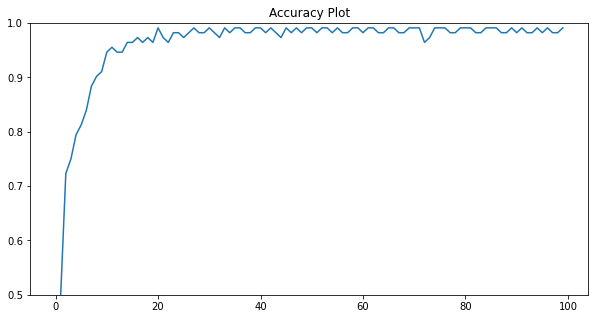

In [100]:
plt.figure(figsize=(10, 5))

val_acc = hcOrg.history['accuracy']
plt.plot(val_acc)

plt.title("Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

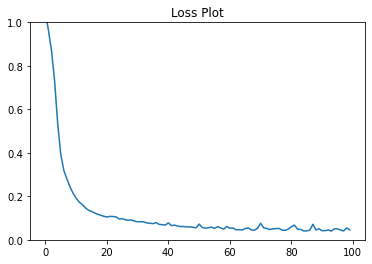

In [101]:
val_loss = hcOrg.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

### PCA Model

In [102]:
# Split the data set into training and testing
X_trainNew, X_testNew, Y_trainNew, Y_testNew = train_test_split(
    Y, YOrg, test_size=0.25, random_state=2)

In [125]:
from keras.models import Sequential
from keras.layers import Dense

modelPCA = Sequential()

modelPCA.add(Dense(6, activation='relu', input_shape=(2,)))

modelPCA.add(Dense(3, activation='softmax'))

In [126]:
modelPCA.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hcPCA = modelPCA.fit(X_trainNew, Y_trainNew,epochs=100, batch_size=1, verbose=1, validation_data=(X_testNew, Y_testNew))

Train on 112 samples, validate on 38 samples
Epoch 1/100
112/112 [==============================] - 0s 2ms/step - loss: 1.2811 - accuracy: 0.1429 - val_loss: 0.9330 - val_accuracy: 0.3421
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 1.0777 - accuracy: 0.3304 - val_loss: 0.7970 - val_accuracy: 0.5000
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.9414 - accuracy: 0.4286 - val_loss: 0.7075 - val_accuracy: 0.6579
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5446 - val_loss: 0.6449 - val_accuracy: 0.8684
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.7623 - accuracy: 0.7411 - val_loss: 0.5942 - val_accuracy: 0.8947
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7946 - val_loss: 0.5410 - val_accuracy: 0.8947
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.8

112/112 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9107 - val_loss: 0.1594 - val_accuracy: 0.8947
Epoch 58/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9018 - val_loss: 0.1583 - val_accuracy: 0.8947
Epoch 59/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9107 - val_loss: 0.1574 - val_accuracy: 0.8947
Epoch 60/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9018 - val_loss: 0.1558 - val_accuracy: 0.8947
Epoch 61/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9107 - val_loss: 0.1562 - val_accuracy: 0.8947
Epoch 62/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9107 - val_loss: 0.1561 - val_accuracy: 0.8947
Epoch 63/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9107 - val_loss: 0.1541 - val_accuracy: 0.8947
Epoch

In [127]:
scorePCA = modelPCA.evaluate(X_testNew, Y_testNew,verbose=1)
print(scorePCA)

38/38 [==============================] - 0s 105us/step
[0.14536130124408947, 0.8947368264198303]


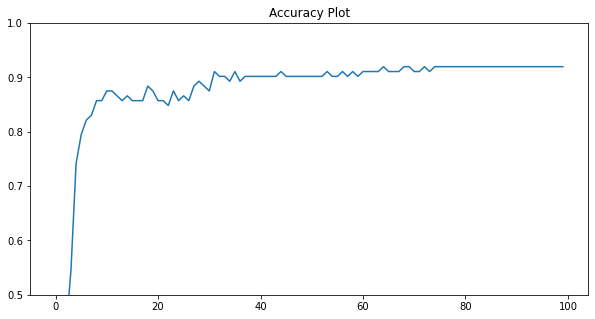

In [128]:
plt.figure(figsize=(10, 5))

val_acc = hcPCA.history['accuracy']
plt.plot(val_acc)

plt.title("Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

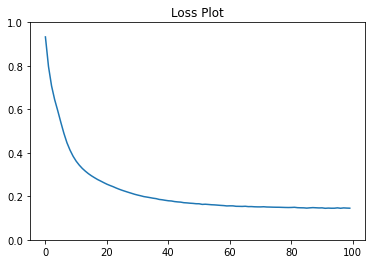

In [129]:
val_loss = hcPCA.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

# K MEANS


In [142]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

kmeansPCA = KMeans(n_clusters = 3, random_state = 0)
y_kmeansPCA = kmeansPCA.fit_predict(Y)

Text(0.5, 1.0, 'KMeans Original')

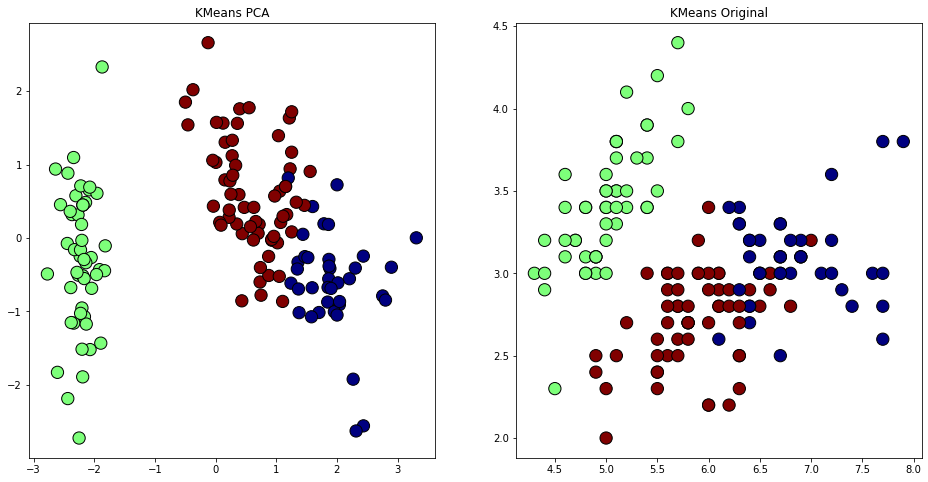

In [143]:
#this will tell us to which cluster does the data observations belong.
new_labels = kmeans.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(Y[:, 0], Y[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)

axes[0].set_title('KMeans PCA')
axes[1].set_title('KMeans Original')

0 - blue   Virginica
1 - green  Setosa
2 - red    Versicolor

In [144]:
print(kmeans.predict(X))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [145]:
print(kmeansPCA.predict(Y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [158]:
correctClass = ['Iris-virginica','Iris-setosa','Iris-versicolor']
corr = 0
for res, correct in zip(kmeansPCA.predict(Y), y):
    if (correctClass[res] == correct):
        corr += 1
        
print(corr/150)

0.8333333333333334


In [159]:
corrOrg = 0
for res, correct in zip(kmeans.predict(X), y):
    if (correctClass[res] == correct):
        corrOrg += 1
        
print(corrOrg/150)

0.8933333333333333
